In [1]:
import requests
user = "sprotasov"
server = "sprotasov.ru"
port = 12345
url = "http://{0}:{1}/{2}".format(server, port, user)
raw = requests.get(url).text
lines = raw.strip().split('\n')

In [2]:
import datetime

class Item:
    def __init__(self, text):
        self.text = text
        words = text.split('\t')
        self.ts = int(words[0])
        self.time = datetime.datetime.fromtimestamp(self.ts)
        self.action = words[1]
        self.args = words[2:]
        
    def time_to(self, event):
        if event:
            return event.ts - self.ts
        else:
            return 0
    
    def __str__(self):
        return "@{0} случилось {1} с аргументами {2}".format(self.time, self.action, self.args)

    def __repr__(self):
        return self.__str__()
    
    
def get_all(events, action):
    return [event for event in events if event.action==action]

events = [Item(x) for x in lines]
get_all(events, 'sleep')

[@2018-02-26 23:07:00 случилось sleep с аргументами [],
 @2018-02-26 23:09:39 случилось sleep с аргументами [],
 @2018-02-26 23:09:41 случилось sleep с аргументами [],
 @2018-02-28 18:45:39 случилось sleep с аргументами [],
 @2018-03-02 09:56:21 случилось sleep с аргументами [],
 @2018-03-02 10:26:06 случилось sleep с аргументами [],
 @2018-03-02 10:26:11 случилось sleep с аргументами [],
 @2018-03-02 10:26:19 случилось sleep с аргументами [],
 @2018-03-02 10:40:16 случилось sleep с аргументами [],
 @2018-03-02 10:40:24 случилось sleep с аргументами [],
 @2018-03-02 10:44:19 случилось sleep с аргументами [],
 @2018-03-02 10:44:30 случилось sleep с аргументами []]

In [3]:
def consequense_in_range(events, action_open, action_close, time_hours=10, single=True):
    time_sec = time_hours * 3600
    opens = get_all(events, action_open)
    closes = get_all(events, action_close)
    pairs = []
    for op in opens:
        pair = [op, None]
        subr = filter(lambda e: e.ts > op.ts and e.ts <= op.ts + time_sec, closes)
        if single:
            pair[1] = next(subr, None)
        else:
            pair[1] = list(subr)       
        pairs.append(pair)
    return pairs

sleeps = consequense_in_range(events, 'sleep', 'wakeup', 12)
print(len(sleeps))
day = 3600 * 24
recent_sleeps = [s for s in sleeps if datetime.datetime.now().timestamp() - s[0].ts < 2600]
print(len(recent_sleeps))

12
7


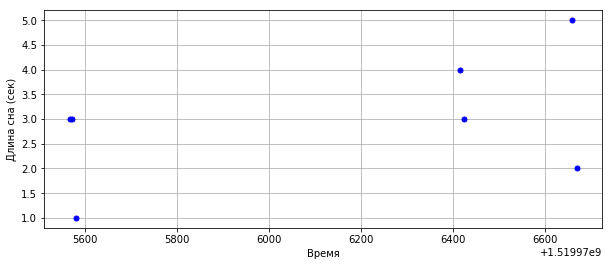

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
vals = [p[0].ts for p in recent_sleeps]
times = [p[0].time_to(p[1]) for p in recent_sleeps]
plt.plot(vals, times, 'bo', markersize=5)
plt.grid(True)
plt.xlabel('Время')
plt.ylabel('Длина сна (сек)')
plt.show()